In [4]:
from models.knn import KNN
from src.data import get_train_test_split, regexp_processing
from src.criterion import get_recall
from src.constants import constants
CLASSES = constants['classes']

import numpy as np
import seaborn as sns

In [5]:
train, test = get_train_test_split(transform=regexp_processing)

In [6]:
model = KNN(k=4, classes=CLASSES)

In [7]:
model.fit(train)

In [8]:
model.eval(test)

100%|██████████| 50/50 [00:02<00:00, 20.20it/s]


(0.82,
 [('BAL', 'BEANR', 'NLRTM'),
  ('FROM GBSOU TO ESSDR', 'BEANR', 'ESSDR'),
  ('FR NTE', 'FRLEH', 'NLRTM'),
  ('FR DON', 'FRLEH', 'BEANR'),
  ('FR NTE', 'FRLEH', 'NLRTM'),
  ('RU PRI', 'BEANR', 'FRBOD'),
  ('FRMTX', 'FRLEH', 'FRMTX'),
  ('ST.MALO/FRANCE.', 'FRBES', 'FRSML'),
  ('ROTTERDAM FOR ORDERS', 'BEANR', 'NLRTM')])

In [88]:
model("Rotterdam")

('NLRTM',
 {'FRBES': 0,
  'ESSDR': 0.13447071068499755,
  'NLRTM': 0.7310585786300049,
  'BEANR': 0,
  'FRLEH': 0,
  'FRSML': 0,
  'ESBIO': 0,
  'FRMTX': 0.13447071068499755,
  'FRIRK': 0,
  'FRBOD': 0},
 [('ROTTERAM', 'NLRTM'),
  ('MONTOIR  FRANCE', 'FRMTX'),
  ('SANTANDER', 'ESSDR'),
  ('ROTTERDAM', 'NLRTM')])

100%|██████████| 50/50 [00:04<00:00, 12.11it/s]


[Text(0.5, 1.0, 'Accuracy'),
 Text(0.5, 0, 'k parameter'),
 Text(0, 0.5, 'Accuracy')]

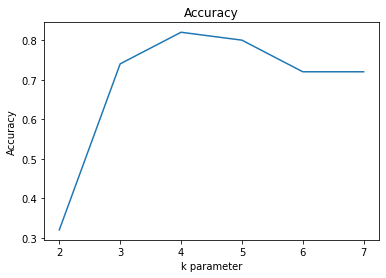

In [10]:
accuracies = []

for k in range(2, 8):
    model = KNN(k=k, classes=CLASSES)
    model.fit(train)
    acc,_ = model.eval(test)
    
    accuracies.append(acc)

sns.lineplot(x=range(2,8), y=accuracies).set(title="Accuracy", xlabel="k parameter", ylabel="Accuracy")

In [11]:
model = KNN(k=4, classes=CLASSES)
model.fit(train)
get_recall(model, test)

(0.8, 0.9, 0.94)